## Quick Colorgram notebook

This notebook will quickly generate a colorgram for a searched word.

In [1]:
import compsyn
import os

[2021-03-20 20:00:55,647] (compsyn.setup_globals)  DEBUG: jzazbz transformation will use /Volumes/LACIE/compsyn/jzazbz_array.npy


In [2]:
from compsyn.helperfunctions import settings, search_and_download, run_google_vision, write_img_classifications_to_file

In [3]:
from compsyn.wordnet_functions import get_wordnet_tree_data

In [4]:
search_terms = ['explore']
number_images = 100 

In [6]:
img_urls_dict = {}
for search_term in search_terms:
    urls = search_and_download(
        search_term = search_term, 
        driver_browser = "Firefox",
        driver_executable_path = "/usr/local/bin/geckodriver", 
        driver_options = ["--headless"],
        number_images = number_images
    )
    img_urls_dict[search_term] = urls

[2021-03-20 20:36:38,123] (compsyn.search_and_download)  INFO: Will download images to ./downloads
[2021-03-20 20:36:45,171] (compsyn.fetch_image_urls)  INFO: Found: 100 search results. Extracting links from 0:100
[2021-03-20 20:38:11,729] (compsyn.fetch_image_urls)  INFO: Found: 100/100 image links, done!
[2021-03-20 20:38:16,320] (compsyn.search_and_download)  WARNING: 1 images could not be downloaded from the scraped URLs: defaultdict(<class 'list'>, {UnexpectedHTMLResponseFromImgSrcError(): ['https://mk0camerajabberhe53n.kinstacdn.com/wp-content/uploads/2018/11/Shimoda_40_02.jpg']})


In [7]:
imagedata = compsyn.datahelper.ImageData()

In [8]:
imagedata.load_image_dict_from_folder("downloads/explore")

[2021-03-20 20:39:23,760] (compsyn.ImageData)  DEBUG: loaded 72 images for "explore"
[2021-03-20 20:39:23,761] (compsyn.ImageData)  DEBUG: creating jzazbz arrays from rgb arrays for ['explore']


In [9]:
imageanalysis = compsyn.analysis.ImageAnalysis(imagedata)

In [10]:
imageanalysis.compute_color_distributions(imageanalysis.labels_list, color_rep=['jzazbz', 'rgb'])

[2021-03-20 20:39:29,235] (compsyn.ImageAnalysis)  DEBUG: compute_color_distributions for ['explore']


In [11]:
compressed_image_dict = imageanalysis.get_composite_image()

[2021-03-20 20:39:30,722] (compsyn.ImageAnalysis)  INFO: explore is being compressed.


In [12]:
imageanalysis.save_colorgram_to_disk() 

In [13]:
import PIL
import numpy as np

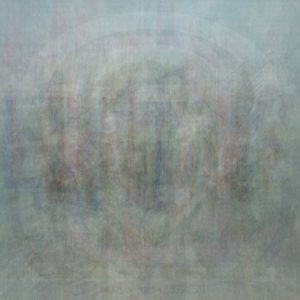

In [14]:
PIL.Image.fromarray(compressed_image_dict['explore'].astype(np.uint8))

### Colorgram options

The composite image function allows various parameters, to choose the first N images, to randomly sample from the 

In [15]:
compressed_image_50 = imageanalysis.get_composite_image(num_of_images=50)

[2021-03-20 20:39:38,485] (compsyn.ImageAnalysis)  INFO: explore is being compressed.


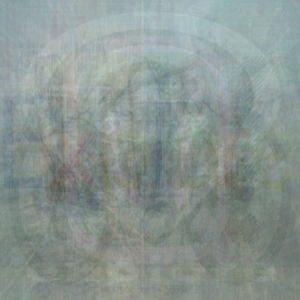

In [16]:
PIL.Image.fromarray(compressed_image_50['explore'].astype(np.uint8))

In [17]:
compressed_image_50_rev = imageanalysis.get_composite_image(num_of_images=50, reverse=True)

[2021-03-20 20:39:42,667] (compsyn.ImageAnalysis)  INFO: explore is being compressed.


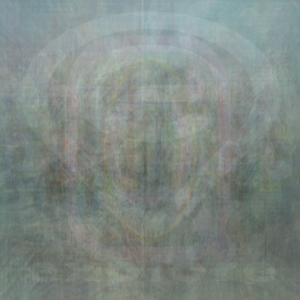

In [18]:
PIL.Image.fromarray(compressed_image_50_rev['explore'].astype(np.uint8))

In [19]:
compressed_image_sample = imageanalysis.get_composite_image(num_of_images=50, sample=True)

[2021-03-20 20:39:46,045] (compsyn.ImageAnalysis)  INFO: explore is being compressed.


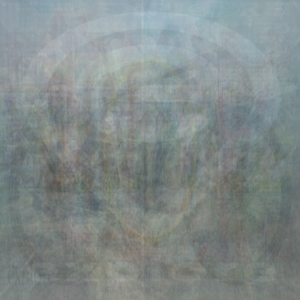

In [20]:
PIL.Image.fromarray(compressed_image_sample['explore'].astype(np.uint8))